# Part I. One-sided finite differences

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [2]:
def deriv(f, x0, h):
    """ Compute a derivative of `f` at point `x0` with step size `h`.
    
    Compute the derivative using the one-sided rule of the approximation order of $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        The function to differentiate
    x0 : float
        The point to compute the derivative at.
    h : float
        The step size for the finite different rule.
        
    Returns
    -------
    fder : derivative of f(x) at point x0 using the step size h.
    """
    fder = (- 1.5 * f(x0) + 2 * f(x0 + h) - 0.5 * f(x0 + 2 * h)) / h
    
    return fder

#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [3]:
x0 = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x ** 3, x0, h)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


In [4]:
# The dependence of an error on the step h is quadratic, as expected.

### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [5]:
import numpy as np
from matplotlib import pyplot as plt

def f(x):
    return x ** 2 * np.log(x)
    
def fder(x):
    return x * (2. * np.log(x) + 1)

def deriv_2(f, x0, h):
    fder = (f(x0 + h) - f(x0)) / h
    return fder

def deriv_2corr(f, x0, h):
    x1 = x0 + h
    dx = x1 - x0
    df = f(x1) - f(x0) 
    fder = df / dx
    return fder

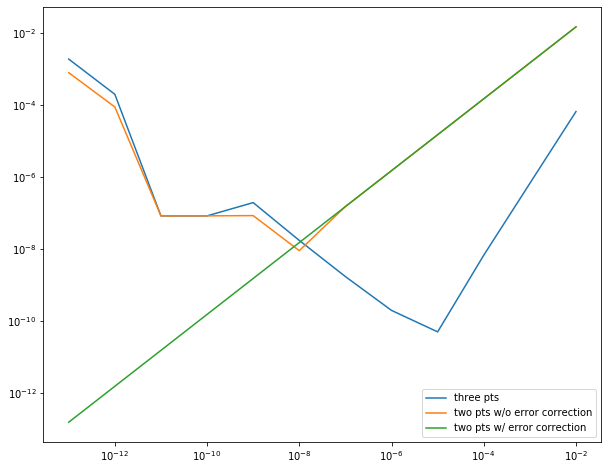

In [10]:
h = np.power(np.full(12, 10.), np.arange(-2, -14, -1))
x0 = 1
err1 = [np.abs(deriv(f, x0, h_) - fder(x0)) for h_ in h]
err2 = [np.abs(deriv_2(f, x0, h_) - fder(x0)) for h_ in h]
err3 = [np.abs(deriv_2corr(f, x0, h_) - fder(x0)) for h_ in h]

plt.figure(figsize=(10, 8))
plt.plot(h, err1, label='three pts')
plt.plot(h, err2, label='two pts w/o error correction')
plt.plot(h, err3, label='two pts w/ error correction')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [76]:
# As we can see, h_opt = 1e-5 (roughly) for three points rule and h_opt = 1e-8 for two points rule without error corrections. For two points rule WITH error corrections, we can go as low as we please.

### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [75]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x ** 2 * np.log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x * (2 * np.log(x) + 1)

x0 = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = np.abs(deriv(f, x0, h) - fder(x))
    print("%5f -- %7.4g" % (h, err))

0.010000 -- 0.01386
0.001000 -- 0.001386
0.000100 -- 0.0001386
0.000010 -- 1.386e-05


In [ ]:
# The dependence of an error on the step h is linear. 

# Part II. Midpoint rule 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [8]:
def midpoint_rule(func, a, b, eps):
    """ Calculate the integral of f from a to b using the midpoint rule.
    
    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    eps : float
        The target accuracy of the estimate.
        
    Returns
    -------
    integral : float
        The estimate of $\int_a^b f(x) dx$.
    """
    N = 1
    I_ = float('inf')
    while True:
        h = (b - a) / N
        Q = np.asarray([h * func(a + k * h - h / 2) for k in range(1, N + 1)])
        I = np.sum(Q)
        err = np.abs(I - I_)
        if err >= eps:
            N = 2 * N
            I_ = I
        else:
            break
    return I, N

### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


0.88137381180281 256


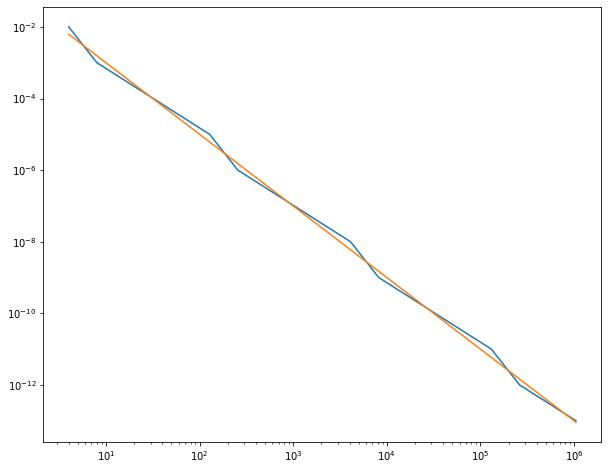

In [9]:
def func(x):
    return 1 / np.sqrt(x ** 2 + 1)

I, N = midpoint_rule(func, 0, 1, 1e-6)
print(I, N)

eps = np.power(np.full(12, 10.), np.arange(-2, -14, -1))
N = [midpoint_rule(func, 0, 1, eps_)[1] for eps_ in eps]
N_sqr = [0.1 / (n ** 2) for n in N]

plt.figure(figsize=(10, 8))
plt.plot(N, eps)
plt.plot(N, N_sqr)
plt.xscale('log')
plt.yscale('log')
plt.show()

### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

In [153]:
def func(x):
    return np.sin(np.sqrt(x)) / x

def sub_singularity(x):
    return np.sin(np.sqrt(x)) / x - 1 / np.sqrt(x)

In [156]:
I, N = midpoint_rule(func, 0, 1, 1e-4)
print(I, N)

1.8919572892043148 8388608


In [155]:
I, N = midpoint_rule(sub_singularity, 0, 1, 1e-4)

print(I + 2.0, N)

1.892113005639548 32


In [ ]:
# Substracting singularity makes the proccess much faster.